In [1]:
#Importing necesary data pacakages
import rasterio 
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
import time
import cv2
from scipy import ndimage

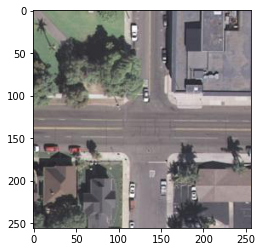

In [2]:
img = io.imread('intersection94.jpg')
imgGray = color.rgb2gray(img)      #incase needed
plt.imshow(img)

**1. For a given spatial operator, compare the filtering effect and CPU time when increasing the kernel size.**

In [3]:
#using smoothing filter of kernel 3x3
start_time = time.time()
#gaussian filter
gauss_blur = cv2.GaussianBlur(img, (3,3), 0)
end_time = time.time()
time_taken = end_time-start_time
print('with kernel size 3x3, time take= ',time_taken)

#using smoothing filter of kernel 5x5
start_time1 = time.time()
#gaussian filter
gauss_blur1 = cv2.GaussianBlur(img, (5,5), 0)
end_time1 = time.time()
time_taken1 = end_time1-start_time1
print('with kernel size 5x5, time take= ',time_taken1)

with kernel size 3x3, time take=  0.018154382705688477
with kernel size 5x5, time take=  0.0009849071502685547


Though theoretically we know that as the kernel size increases computation will be faster, practically from above example applied on simple smoothing filter shows that as kernel size was increase time complexity decreased.

**2. For a given spatial operator, compare the filtering effect and CPU time for 2D seperable kernel and its 1D alternatives.**

A spatial separable convolution simply divides a kernel into two, smaller kernels. The most common case would be to divide a 3x3 kernel into a 3x1 and 1x3 kernel. Gaussian kernel is one of the separable kernels, which allows fast computation.

A separable filter in image processing can be written as product of two more simple filters. Typically a 2-dimensional convolution operation is separated into two $1$-dimensional filters. This reduces the computational costs on an ${\displaystyle N\times M}$ image with a ${\displaystyle m\times n}$ filter from ${\displaystyle {\mathcal {O}}(M\cdot N\cdot m\cdot n)}{\displaystyle {\mathcal {O}}(M\cdot N\cdot m\cdot n)}$ down to ${\displaystyle {\mathcal {O}}(M\cdot N\cdot (m+n))}$

In [4]:
#2d gaussian seperable kernel
start_time_2d = time.time()
from astropy.convolution import Gaussian2DKernel
gaussian_2D_kernel = Gaussian2DKernel(10)
end_time_2d = time.time()
time_taken_2d = end_time_2d-start_time_2d
print('Time taken by 2d seperable kernel for sharpening= ', time_taken_2d)

#1d gaussian seperable kernel
start_time_1d = time.time()
from astropy.convolution import Gaussian1DKernel
gauss_1D_kernel = Gaussian1DKernel(10)
end_time_1d = time.time()
time_taken_1d = end_time_1d-start_time_1d
print('Time taken by 1d seperable kernel for sharpening= ', time_taken_1d)

Time taken by 2d seperable kernel for sharpening=  5.536040782928467
Time taken by 1d seperable kernel for sharpening=  0.0017101764678955078


When I was performing above computation for comparision of 2d and 1d kernel, initially it was seen that 2d kernel computation time was 5sec where as for 1d was 0.0019sec. But, I don't exactly know the reason but as soon as I rerun the code time complexity decreases higly for 2d as in this case 0.00521sec and for 1d 0.002(which was not much different from previous). 

Conculusion is that computation with 1d kernel was quick.

**3. Compare the results of different smoothing operators.**

Noises are suppressed by blurring using smoothing operators.  

In **homogenous filter**  each output pixel is mean of its kernel neighbour and all pixels contribute with equal weight. Mathematically, with $K$ kernel: $$K = \frac{1}{K_{width}xK_{height}}$$

In **gaussian filter**, we use different weight kernel in both x and y direction. Here weight decreases with neighbourhood center.As Gaussian is designed to use for removing high frequency noise in the image.

**Median filter** is something that replace each pixel's value with the median of its neighbouring pixels. This method is great when dealing with "salt and pepper noise."

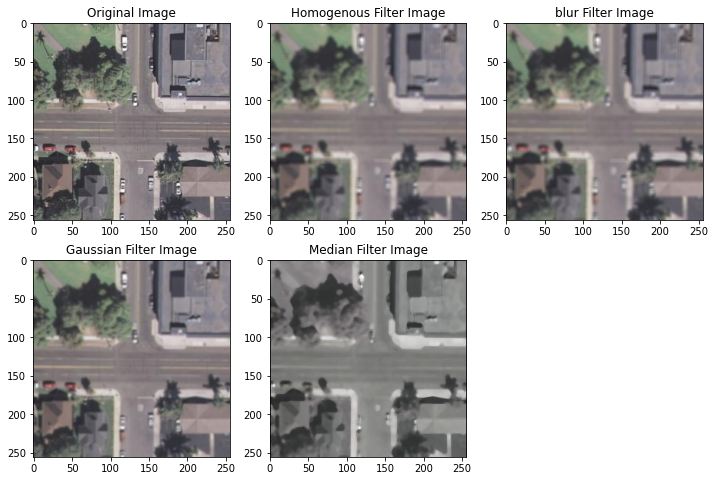

In [5]:
#using opencv to smoothing/bluring/removing noise

# homogenous filter
kernel = np.ones((5,5), np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

#low pass filter kernel: blur/averaging
blur = cv2.blur(img, (5,5))

#gaussian filter
gauss_blur = cv2.GaussianBlur(img, (5,5), 0)

#median filter
median = ndimage.median_filter(img, size=5) # kernel size must be odd



plt.figure(figsize = (12,8))
plt.subplot(231)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(232)
plt.title('Homogenous Filter Image')
plt.imshow(dst)
plt.subplot(233)
plt.title('blur Filter Image')
plt.imshow(blur)
plt.subplot(234)
plt.title('Gaussian Filter Image')
plt.imshow(gauss_blur)
plt.subplot(235)
plt.title('Median Filter Image')
plt.imshow(median)
# plt.subplot(236)
# plt.title('Bilateral Filter Image')
# plt.imshow(bilateral)
plt.show()

Here, it is seen that with the kernel size of 5 for each operator they produced more or less similar outcome. But I still prefer that median filter perfomed more better for this case.

**4. Compare the result of different sharpening operators.**

Sharpening is considered as an inverse process of image bluring is a combination of resolution(size of image) and acutance(contrast at edges).

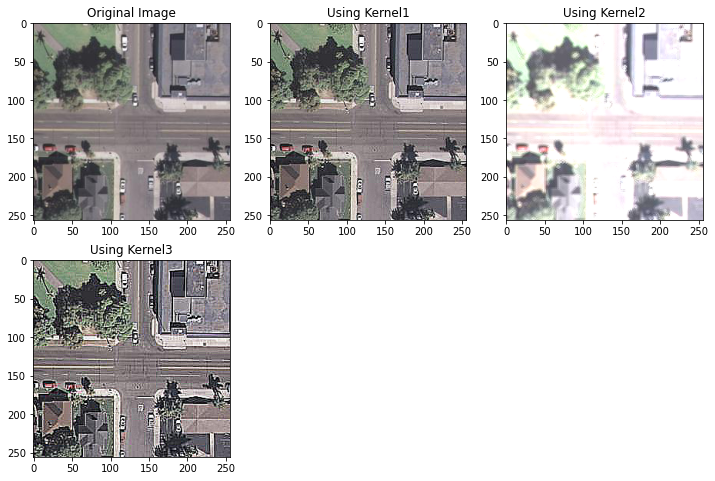

In [7]:
#defining different types of kernels
kernel1 = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
kernel2 = np.array([[0, 1, 0],
                    [1, -2, 1],
                    [0, 1, 0]])
kernel3 = np.array([[-1, -1, -1],
                    [-1, 9, -1],
                    [-1, -1, -1]])
#sharpening
image_sharp1 = cv2.filter2D(src=img, ddepth=-1, kernel=kernel1)
image_sharp2 = cv2.filter2D(src=img, ddepth=-1, kernel=kernel2)
image_sharp3 = cv2.filter2D(src=img, ddepth=-1, kernel=kernel3)

#plotting
plt.figure(figsize = (12,8))
plt.subplot(231)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(232)
plt.title('Using Kernel1')
plt.imshow(image_sharp1)
plt.subplot(233)
plt.title('Using Kernel2')
plt.imshow(image_sharp2)
plt.subplot(234)
plt.title('Using Kernel3')
plt.imshow(image_sharp3)
plt.show()

Above result shows that kernel3 with second order derivative gave better result as sharpening operator compared to the two other.

**5. Are smoothing/sharpening operators invertible?**

$\rightarrow$ Though smoothing and sharpening operators are inverse to each other they are not invertible and we cannot invert our image back to the previous one. The reason behind this is as our information get loss during the filter application process and that cannot be undone.

**6. Compare the result of different edge detection operators.**

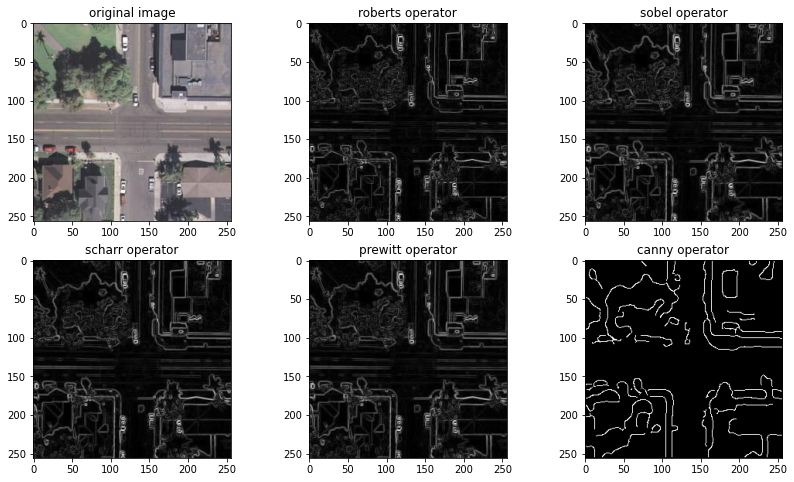

In [6]:
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.feature import canny

#applying edge detectors
edge_roberts = roberts(imgGray)
edge_sobel = sobel(imgGray)
edge_scharr = scharr(imgGray)
edge_prewitt = prewitt(imgGray)
edge_canny = canny(imgGray, sigma=3)       # it also does noise reduction and gradient

#plotting
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.subplot(232)
plt.imshow(edge_roberts, cmap='gray')
plt.title('roberts operator')
plt.subplot(233)
plt.imshow(edge_sobel, cmap='gray')
plt.title('sobel operator')
plt.subplot(234)
plt.imshow(edge_scharr, cmap='gray')
plt.title('scharr operator')
plt.subplot(235)
plt.imshow(edge_prewitt, cmap='gray')
plt.title('prewitt operator')
plt.subplot(236)
plt.imshow(edge_canny, cmap='gray')
plt.title('canny operator')
plt.show()

Canny operator performed better compared to the rest but it was realized that the operator is highly dependent on the value of sigma for computation. Higher the value of sigma lesser is the edge captured.

**7. Compare the linear and nonlinear filtering operators.**

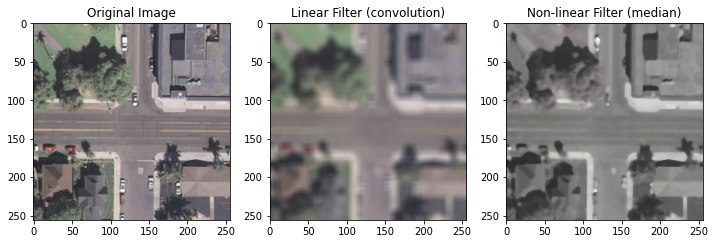

In [7]:
#convolution is a kind of linear filter
kernel = np.ones((10,10),np.float32)/100
cnv = cv2.filter2D(img, -1, kernel)

#median smoothing filter is an example of non linear function
median = ndimage.median_filter(img, size=5) # kernel size must be odd

plt.figure(figsize = (12,8))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(132)
plt.title('Linear Filter (convolution)')
plt.imshow(cnv)
plt.subplot(133)
plt.title('Non-linear Filter (median)')
plt.imshow(median)
plt.show()

Nonlinear filters have quite different behavior compared to linear filters.

A linear filter is one that can be done with a convolution, which is just the linear sum of values in a sliding window. Linear filtering is the filtering method in which the value of output pixel is linear combinations of the neighbouring input pixels.

The simplest nonlinear filter to consider here is the median filter. In the median filter, filter output depends on the ordering of input values, usually ranked from smallest to largest or vice versa. A filter support range with an odd number of values is used, making it easy to select the output.

**8. Propose separable implementation of nonlinear operators.**

$\rightarrow$ In the above example median filter was considered as one of the example of non-linear operator. But, it was studied that this nonlinear operator is not seperable. Though not seperable, this operator can be implemented for smoothing operation like a seperable filters.

**9. Verify the ability off edge-preserving smoothing filters.**

With all these filter we not just blur the images but also smoothen the edges but sometimes it is necessary to preserve them, so for this **bilateral filter** is used.

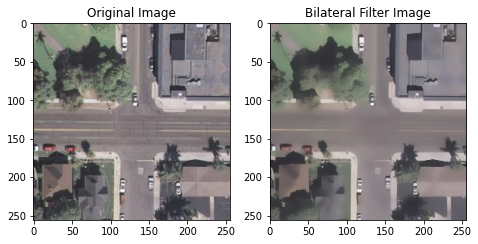

In [10]:
#bilateral filter
bilateral = cv2.bilateralFilter(img, 15, 75, 75)

plt.figure(figsize = (12,8))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(132)
plt.title('Bilateral Filter Image')
plt.imshow(bilateral)
plt.show()

Bilateral can be used in situation where we need to preserve the edges.